# Project: Predicting Survival of COVID-19 Patients



# Name: Bhavesh, Karolina
# CUS-620
# Data Mining Project 

##### Dataset credits: Tanmoy Mukherjee https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv




#Importing libraries 

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
# if we want to import the dataset directly
from google.colab import files 
uploaded = files.upload()

Saving 201130COVID19MEXICO.csv to 201130COVID19MEXICO.csv


In [ ]:
from google.colab import drive #here we mount google drive with this so, we can import file from google drive directly
drive.mount('/content/Mydrive/') 

Drive already mounted at /content/Mydrive/; to attempt to forcibly remount, call drive.mount("/content/Mydrive/", force_remount=True).


In [ ]:
#uploaded the datset to google drive so, now it works as local pc 
df=pd.read_csv('covid.csv') #made pandas dataframe for the dataset
df #print the database with pandas dataframe

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
0,2,1,9999-99-99,2,75,1,2,2,2,2,2,1,2,2,2,1
1,2,1,9999-99-99,2,23,2,2,2,2,2,2,2,2,2,2,1
2,1,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,1
3,1,1,9999-99-99,2,47,2,2,2,2,2,2,2,2,2,2,1
4,2,2,3/30/20,1,58,1,1,2,2,1,2,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,9999-99-99,2,33,2,2,2,2,2,2,2,2,2,2,1
1048571,2,1,9999-99-99,2,22,2,2,2,2,2,2,2,2,2,2,1
1048572,2,2,9999-99-99,1,52,2,2,2,2,2,2,2,1,2,2,1
1048573,1,1,9999-99-99,2,35,2,2,2,2,2,2,2,2,2,2,1


In [ ]:
df.columns #to know all the columns names

Index(['sex', 'patient_type', 'date_died', 'pneumonia', 'age', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'covid_res'],
      dtype='object')

In [ ]:
#checking if there is any missing value in the dataset
df.isnull().sum()

sex               0
patient_type      0
date_died         0
pneumonia         0
age               0
diabetes          0
copd              0
asthma            0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
covid_res         0
dtype: int64

In [ ]:
#checking head 
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


# Pre-Processing 

In [ ]:
df = df.drop(columns=['id','entry_date','date_symptoms','intubed','pregnancy','icu','contact_other_covid'])

In [ ]:
df.columns

Index(['sex', 'patient_type', 'date_died', 'pneumonia', 'age', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'covid_res'],
      dtype='object')

In [ ]:
#changing date died values from 9999-99-99 to 0 which mean not died
df["date_died"] = np.where(df["date_died"] == '9999-99-99', 0, df["date_died"])

In [ ]:
#changing date died values from given dates to 1 which mean died
df["date_died"] = np.where(df["date_died"] != 0, 1, df["date_died"])

In [ ]:
#this dataset is about covid and we trying to figure out which factor can cause this 
#so, add NA to all the values if the number is greater to 2
#Since we only want to see if case is true(1) or false(0)
def preprocess(columnName):
  df.loc[df[columnName] > 2 , columnName] = np.nan
  df.loc[df[columnName] == 2, columnName] = 0

In [ ]:
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','inmsupr','covid_res','diabetes']
for i in l:
  preprocess(i)

In [ ]:
df.isnull().sum()

sex                    0
patient_type           0
date_died              0
pneumonia          18193
age                    0
diabetes            3641
copd                3323
asthma              3291
inmsupr             3695
hypertension        3367
other_disease       5622
cardiovascular      3407
obesity             3300
renal_chronic       3315
tobacco             3519
covid_res         149678
dtype: int64

#### now we can see there are so many missing values in the data 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sex             566602 non-null  int64  
 1   patient_type    566602 non-null  int64  
 2   date_died       566602 non-null  object 
 3   pneumonia       566591 non-null  float64
 4   age             566602 non-null  int64  
 5   diabetes        564621 non-null  float64
 6   copd            564853 non-null  float64
 7   asthma          564850 non-null  float64
 8   inmsupr         564622 non-null  float64
 9   hypertension    564778 non-null  float64
 10  other_disease   564004 non-null  float64
 11  cardiovascular  564780 non-null  float64
 12  obesity         564821 non-null  float64
 13  renal_chronic   564810 non-null  float64
 14  tobacco         564695 non-null  float64
 15  covid_res       499692 non-null  float64
dtypes: float64(12), int64(3), object(1)
memory usage: 69.2+ 

Removing the missing values 
-----------------------------

In [ ]:
# removing the missing values rows and call the dataframe as a new variable 
df = df.dropna()

In [ ]:
df.to_csv ('/content/Mydrive/My Drive/new_results.csv', index = False, header=True) # this is make a file in the google drive as name

In [ ]:
import numpy as np 
import pandas as pd 
df = pd.read_csv('/content/Mydrive/My Drive/new_results.csv') # reading the new results.csv file from the drive as df

In [ ]:
df# here we can see whole cleaned dataset 

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,ConditionsNum
0,2,1,0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,2,0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,2,2,0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,2,1,0.0,60,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496177,2,1,0,1.0,77,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
496178,2,2,0,1.0,63,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
496179,1,1,0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496180,1,1,0,0.0,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Dataset Attributes Information 
#### sex = Female(1), Male(2)
#### patient_type = Outpatient (1), Inpatient (0)
#### date_died = Died (1), Survived(0)
#### pneumonia = Yes(1), No (0)
#### age = 0 to 120 
#### Diabetes = Yes(1), No (0)
#### copd = Yes(1), No (0)
#### Asthma = Yes(1), No (0)
#### Inmsupr = Yes(1), No (0)
#### hypertension  = Yes(1), No (0)
#### Other_disease = Yes(1), No ()
#### Cardiovascular  = Yes(1), No (0)
#### Obesity = Yes(1), No (0)
#### Renal_chronic = Yes(1), No (0)
#### Tobacco = Yes(1), No (0)
#### Covid_res = Positive(1), Negative (0)

In [ ]:
df.columns # all attributes after cleaning the data 

Index(['sex', 'patient_type', 'date_died', 'pneumonia', 'age', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'covid_res'],
      dtype='object')

In [ ]:
#checking if there is any missing value in the dataset
df.isnull().sum()

sex               0
patient_type      0
date_died         0
pneumonia         0
age               0
diabetes          0
copd              0
asthma            0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
covid_res         0
dtype: int64

In [ ]:
df.notnull().sum()

sex               885962
patient_type      885962
date_died         885962
pneumonia         885962
age               885962
diabetes          885962
copd              885962
asthma            885962
inmsupr           885962
hypertension      885962
other_disease     885962
cardiovascular    885962
obesity           885962
renal_chronic     885962
tobacco           885962
covid_res         885962
dtype: int64

In [ ]:
df.describe() # gives us statistics information about dataset

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
count,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000
mean,1.505961,1.213744,0.067648,0.156172,42.512949,0.124693,0.016527,0.032513,0.016097,0.162804,0.030805,0.022777,0.163930,0.020014,0.086036,0.441076
std,0.499965,0.409948,0.251141,0.363019,16.623441,0.330371,0.127489,0.177359,0.125850,0.369187,0.172788,0.149192,0.370212,0.140050,0.280418,0.496516
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496291 entries, 0 to 496290
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sex             496291 non-null  int64  
 1   patient_type    496291 non-null  int64  
 2   date_died       496291 non-null  int64  
 3   pneumonia       496291 non-null  float64
 4   age             496291 non-null  int64  
 5   diabetes        496291 non-null  float64
 6   copd            496291 non-null  float64
 7   asthma          496291 non-null  float64
 8   inmsupr         496291 non-null  float64
 9   hypertension    496291 non-null  float64
 10  other_disease   496291 non-null  float64
 11  cardiovascular  496291 non-null  float64
 12  obesity         496291 non-null  float64
 13  renal_chronic   496291 non-null  float64
 14  tobacco         496291 non-null  float64
 15  covid_res       496291 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 60.6 MB


In [ ]:
#we may want to consider droping people with age over 100 or 110 because it seems unrealisti
df = df[df['age'] < 100]

In [ ]:
#additional data frames for positive and negative covid cases
covid = df[df['covid_res'] == 1]
noCovid = df[df['covid_res']== 0]

# Visualization Techniques

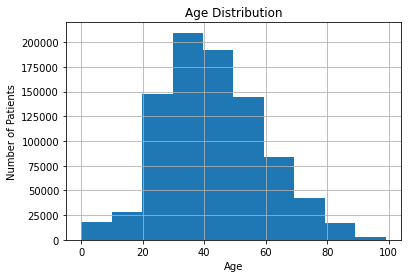

In [ ]:
import matplotlib.pyplot as plt
df['age'].hist(bins=10)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

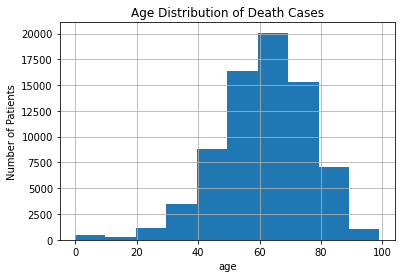

In [ ]:
died = df[df['date_died'] == 1]
died['age'].hist(bins=10)

plt.title('Age Distribution of Death Cases')
plt.xlabel('age')
plt.ylabel('Number of Patients')
plt.show()

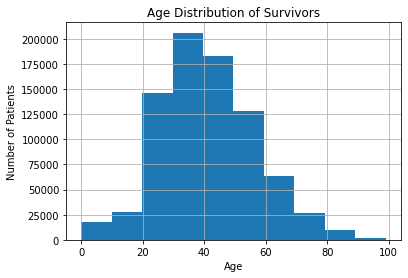

In [ ]:
survived = df[df['date_died'] == 0]
survived['age'].hist(bins=10)

plt.title('Age Distribution of Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

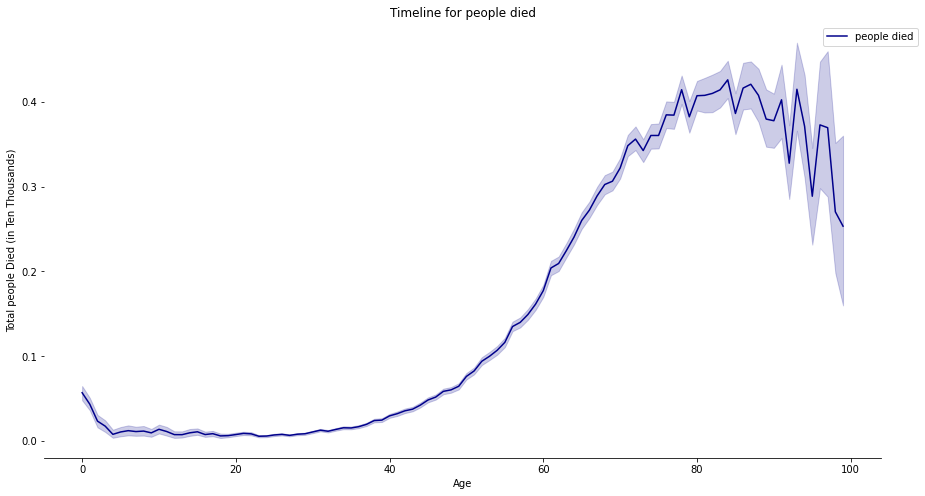

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
de = sns.lineplot(x='age', y=df['date_died'] == 1, data=df, color='darkblue', label='people died')
de.set_xlabel('Age')
de.set_ylabel('Total people Died (in Ten Thousands)')
de.set_title ('Timeline for people died')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1))

##### we can observed people between age 80 to 100 died the most.

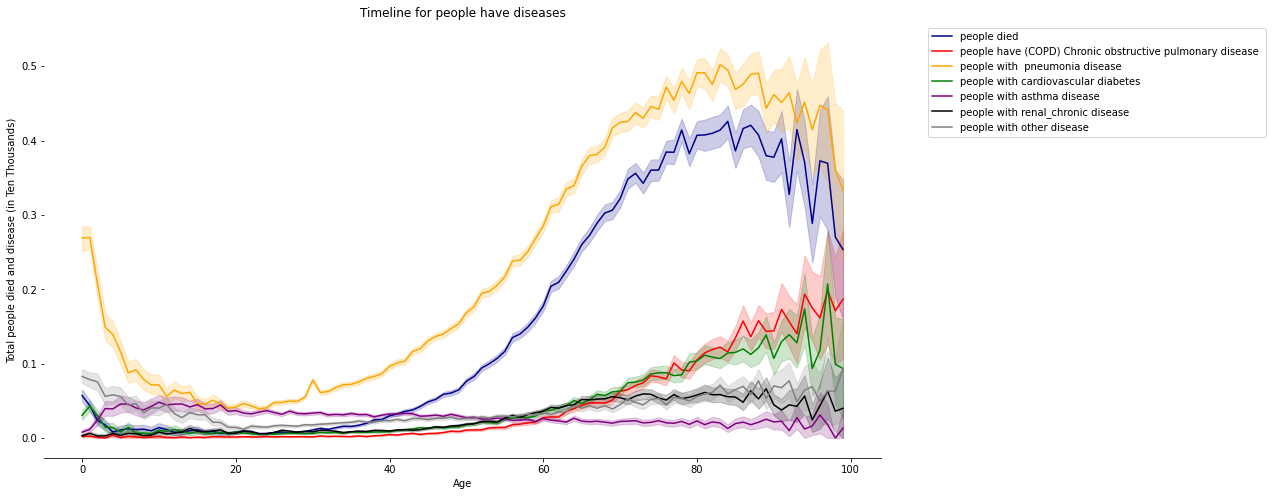

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
de = sns.lineplot(x='age', y=df['date_died'] == 1, data=df, color='darkblue', label='people died')
de = sns.lineplot(x='age', y=df['copd'] == 1 , data=df, color='red', label='people have (COPD) Chronic obstructive pulmonary disease ')
de = sns.lineplot(x='age', y=df['pneumonia'] == 1 , data=df, color='orange', label='people with  pneumonia disease')
de = sns.lineplot(x='age', y=df['cardiovascular'] == 1 , data=df, color='green', label='people with cardiovascular diabetes')
de = sns.lineplot(x='age', y=df['asthma'] == 1 , data=df, color='purple', label='people with asthma disease')
de = sns.lineplot(x='age', y=df['renal_chronic'] == 1 , data=df, color='black', label='people with renal_chronic disease')
de = sns.lineplot(x='age', y=df['other_disease'] == 1 , data=df, color='grey', label='people with other disease')

de.set_xlabel('Age')
de.set_ylabel('Total people died and disease (in Ten Thousands)')
de.set_title ('Timeline for people have diseases')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1))

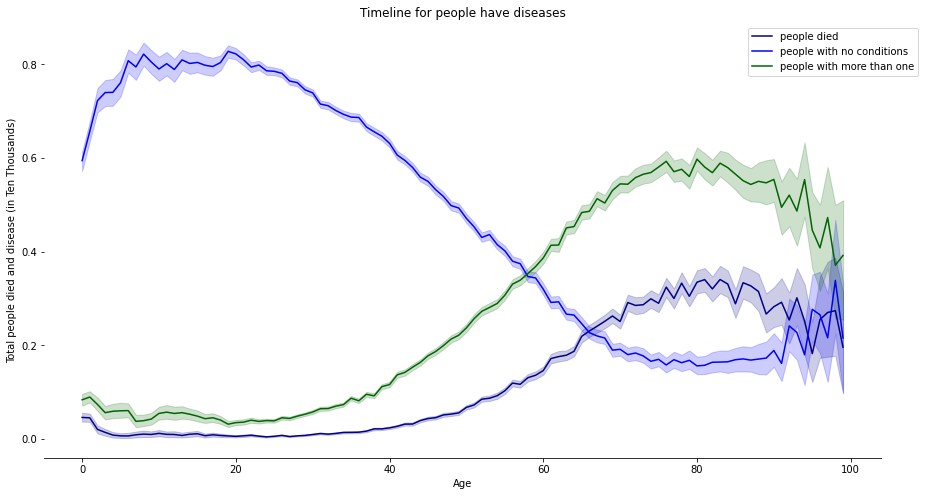

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
de = sns.lineplot(x='age', y=df['date_died'] == 1, data=df, color='darkblue', label='people died')
de = sns.lineplot(x='age', y=df['ConditionsNum'] == 0 , data=df, color='blue', label='people with no conditions')
de = sns.lineplot(x='age', y=df['ConditionsNum'] > 1 , data=df, color='darkgreen', label='people with more than one')

de.set_xlabel('Age')
de.set_ylabel('Total people died and disease (in Ten Thousands)')
de.set_title ('Timeline for people have diseases')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1))

###### By observing these line graphs it looks like people who died most have pneumonia disease. we can study which disease was spread most among people who died but with this graph help it looks like pneumonia disease is higher than other types of disease and the died rate. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender distribution for whole dataset')

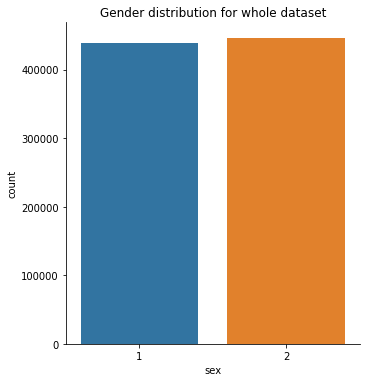

In [ ]:
#1- female, 2-male
sns.catplot('sex',data=df,kind='count')
plt.title('Gender distribution for whole dataset')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People died on Gender basis')

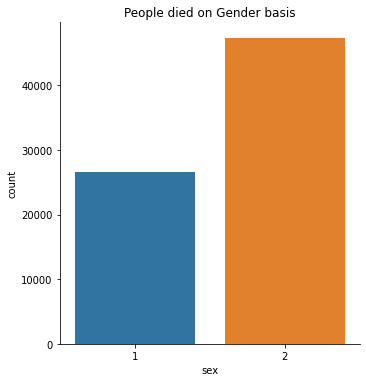

In [ ]:
#1- female, 2-male
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot('sex',data=df[df['date_died'] == 1],kind='count')
plt.title('People died on Gender basis')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' Patient Type Distribution')

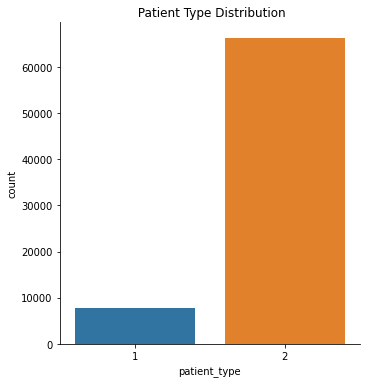

In [ ]:
sns.catplot('patient_type',data=died,kind='count')
plt.title(' Patient Type Distribution')

#### Here we can see more patients were the incoming patients (1) then outgoing patients. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Died Patient Type Distribution')

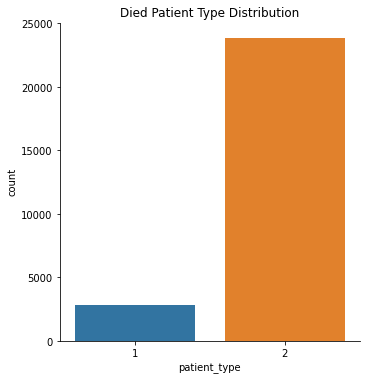

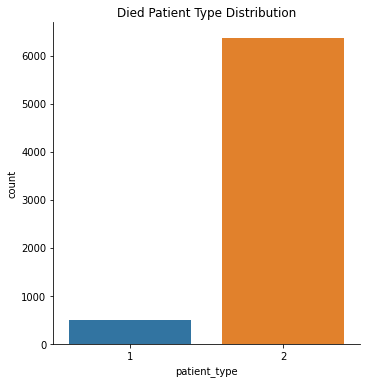

In [ ]:
sns.catplot('patient_type',data=covid[covid['date_died'] == 1],kind='count')
plt.title('Died Patient Type Distribution')

sns.catplot('patient_type',data=noCovid[noCovid['date_died'] == 1],kind='count')
plt.title('Died Patient Type Distribution')

# Data Mining (machine learning) Techniques 

### Classification Models

------------------------------
Training and Testing dataset 
------------------------------

Dividing a dataset into 60% training and 40% testing

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['date_died'], axis=1)
y = df['date_died']
y = y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,test_size=0.4)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(297709, 16)
(198473, 16)
(297709,)
(198473,)


-------------------------
Running classification models on the whole dataset
-------------------------


In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

def run_classifiers(x_train, x_test, y_train, y_test, max_depth = None, criterion = None):
  '''Function takes training and testing sets as well as parameters for decision tree classifier 
  and returns table containing performance scores for decision tree, naive bayes and random forest classifiers'''
  models = [('DT', tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)),
          ('NB', GaussianNB()),
          ('RF', RandomForestClassifier())]
  frame = pd.DataFrame(columns = ['True Negative','True Positive','False Positive', 'False Negative','Accuracy', 'F1-score', 'Recall', 'Precision', 'ROC AUC Score'], index = ['DT', 'NB','RF']) 
  for name,model in models:
    training = model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    f1score = metrics.f1_score(y_test, predictions)
    recall = metrics.recall_score(y_test, predictions)
    precision = metrics.precision_score(y_test, predictions)
    roc = metrics.roc_auc_score(y_test, predictions)
    cm = metrics.confusion_matrix(y_test, predictions)
    TN, TP, FP, FN = cm[0][0], cm[1][1], cm[0][1], cm[1][0]
    frame.loc[name] = [TN, TP, FP, FN, accuracy, f1score, recall, precision, roc]
  return frame

In [ ]:
run_classifiers(x_train, x_test, y_train, y_test, max_depth = 5, criterion = 'entropy')

,True Negative,True Positive,False Positive,False Negative,Accuracy,F1-score,Recall,Precision,ROC AUC Score
DT,182655,3114,2394,10310,0.935991,0.328967,0.231973,0.565359,0.609518
NB,164440,9391,20609,4033,0.875842,0.432526,0.699568,0.313033,0.794099
RF,180754,3714,4295,9710,0.929436,0.346568,0.276669,0.463728,0.626729


-------
### The results run on the whole dataset are not significant due to class imbalance problem. To address the class imbalance problem we used undersampling technique. We used all sample with posotive class (33557) and 50000 of the negative class. Roughly 40:60 ratio


In [ ]:
def train_test(df, classCol, samplenumber, trainratio, testratio):
  ''' 
  function takes data frame, class column, number of samples for undersampling technique and split ratio 
  and creates training and testing using undersampled datset 
  '''
  
    class_no = df[df[classCol] == 0].index
    class_yes = df[df[classCol] == 1].index
    random_index = np.random.choice(class_no, samplenumber, replace = False)
    under_sample_class_no = np.concatenate([class_yes, random_index])
    under_sample = df.loc[under_sample_class_no]

    x = under_sample.drop([classCol], axis=1)
    y = under_sample[classCol]
    y = y.astype(int)
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=trainratio,test_size=testratio)
    return run_classifiers(x_train, x_test, y_train, y_test, max_depth = 5, criterion = 'entropy')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

def cross_validation(df, classCol, samplenumber):
  '''
  This function takes dataframe, class column and number of positive sample for the undersampling 
  and create a undersample set that is used for running classifiers using cross-validation
  it returns table containing performance measures for the classifiers
  '''
  class_no = df[df[classCol] == 0].index
  class_yes = df[df[classCol] == 1].index
  random_index = np.random.choice(class_no, samplenumber, replace = False)
  under_sample_class_no = np.concatenate([class_yes, random_index])
  under_sample = df.loc[under_sample_class_no]

  x = under_sample.drop([classCol], axis=1)
  y = under_sample[classCol]


  models = [('DT', tree.DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('RF', RandomForestClassifier())]
  frame = pd.DataFrame(columns = ['True Negative','True Positive','False Positive', 'False Negative','Accuracy', 'F1-score', 'Recall', 'Precision', 'ROC AUC Score'], index = ['DT', 'NB','RF']) 
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  for name,model in models:
    clf = model
    y_predictions = cross_val_predict(clf, x, y, cv=cv)
    accuracy = accuracy_score(y, y_predictions)
    f1score = metrics.f1_score(y, y_predictions)
    recall = metrics.recall_score(y, y_predictions)
    precision = metrics.precision_score(y, y_predictions)
    roc = metrics.roc_auc_score(y, y_predictions)
    cm = metrics.confusion_matrix(y, y_predictions)
    TN, TP, FP, FN = cm[0][0], cm[1][1], cm[0][1], cm[1][0]
    frame.loc[name] = [TN, TP, FP, FN, accuracy, f1score, recall, precision, roc]
  return frame

In [ ]:
train_test(df, 'date_died', 50000, 0.6, 0.4)

,True Negative,True Positive,False Positive,False Negative,Accuracy,F1-score,Recall,Precision,ROC AUC Score
DT,17263,12258,2853,1050,0.883228,0.862662,0.9211,0.811197,0.889636
NB,17280,10930,2836,2378,0.844004,0.807417,0.82131,0.793985,0.840164
RF,17374,11617,2742,1691,0.867371,0.839773,0.872934,0.80904,0.868312


In [ ]:
cross_validation(df, 'date_died', 50000)

,True Negative,True Positive,False Positive,False Negative,Accuracy,F1-score,Recall,Precision,ROC AUC Score
DT,43542,27994,6458,5564,0.856124,0.823232,0.834198,0.812551,0.852519
NB,42928,27475,7072,6083,0.842564,0.806842,0.818732,0.795293,0.838646
RF,43131,29444,6869,4114,0.868558,0.84281,0.877406,0.810839,0.870013


--------
## Additional column that inditates number of conditions person have is added and the classifiers are re-ran 

In [ ]:
df['ConditionsNum'] = df[['pneumonia', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic']].sum(axis=1)

In [ ]:
train_test(df, 'date_died', 50000, 0.6, 0.4)

,True Negative,True Positive,False Positive,False Negative,Accuracy,F1-score,Recall,Precision,ROC AUC Score
DT,16955,12640,2979,850,0.885442,0.86846,0.93699,0.809271,0.893774
NB,17142,11090,2792,2400,0.844663,0.810317,0.82209,0.798876,0.841014
RF,17181,11784,2753,1706,0.866593,0.840903,0.873536,0.810621,0.867715


In [ ]:
cross_validation(df, 'date_died', 50000)

,True Negative,True Positive,False Positive,False Negative,Accuracy,F1-score,Recall,Precision,ROC AUC Score
DT,43450,27950,6550,5608,0.854496,0.821358,0.832886,0.810145,0.850943
NB,42858,27431,7142,6127,0.8412,0.805243,0.817421,0.793423,0.83729
RF,43024,29297,6976,4261,0.865519,0.839083,0.873026,0.807681,0.866753


---------
Column 'insupr' is dropped and classifiers are re-ran
--------

In [ ]:
df= df.drop(columns=['inmsupr'])

In [ ]:
train_test(df, 'date_died', 50000, 0.6, 0.4)

,True Negative,True Positive,False Positive,False Negative,Accuracy,F1-score,Recall,Precision,ROC AUC Score
DT,17192,12382,2804,1046,0.884813,0.86545,0.922103,0.815356,0.890938
NB,17155,11146,2841,2282,0.846727,0.813131,0.830057,0.796883,0.843989
RF,17220,11695,2776,1733,0.865097,0.838381,0.870941,0.808168,0.866057


In [ ]:
cross_validation(df, 'date_died', 50000)

,True Negative,True Positive,False Positive,False Negative,Accuracy,F1-score,Recall,Precision,ROC AUC Score
DT,43603,28055,6397,5503,0.857584,0.825026,0.836015,0.814321,0.854038
NB,43111,27828,6889,5730,0.848979,0.815174,0.829251,0.801567,0.845735
RF,43167,29382,6833,4176,0.868247,0.842217,0.875559,0.811321,0.869449


[Text(2511.0, 1009.5428571428572, 'patient_type <= 1.5\nentropy = 0.971\nsamples = 111008\nvalue = [66547, 44461]\nclass = 0'),
 Text(1255.5, 854.2285714285715, 'pneumonia <= 0.5\nentropy = 0.38\nsamples = 61404\nvalue = [56864, 4540]\nclass = 0'),
 Text(627.75, 698.9142857142858, 'age <= 51.5\nentropy = 0.232\nsamples = 57508\nvalue = [55331, 2177]\nclass = 0'),
 Text(313.875, 543.6, 'age <= 43.5\nentropy = 0.094\nsamples = 44535\nvalue = [43998, 537]\nclass = 0'),
 Text(156.9375, 388.28571428571433, 'ConditionsNum <= 0.5\nentropy = 0.061\nsamples = 34796\nvalue = [34550, 246]\nclass = 0'),
 Text(78.46875, 232.97142857142865, 'sex <= 1.5\nentropy = 0.041\nsamples = 27130\nvalue = [27009, 121]\nclass = 0'),
 Text(39.234375, 77.65714285714284, 'entropy = 0.02\nsamples = 14003\nvalue = [13976, 27]\nclass = 0'),
 Text(117.703125, 77.65714285714284, 'entropy = 0.061\nsamples = 13127\nvalue = [13033, 94]\nclass = 0'),
 Text(235.40625, 232.97142857142865, 'ConditionsNum <= 2.5\nentropy = 0.1

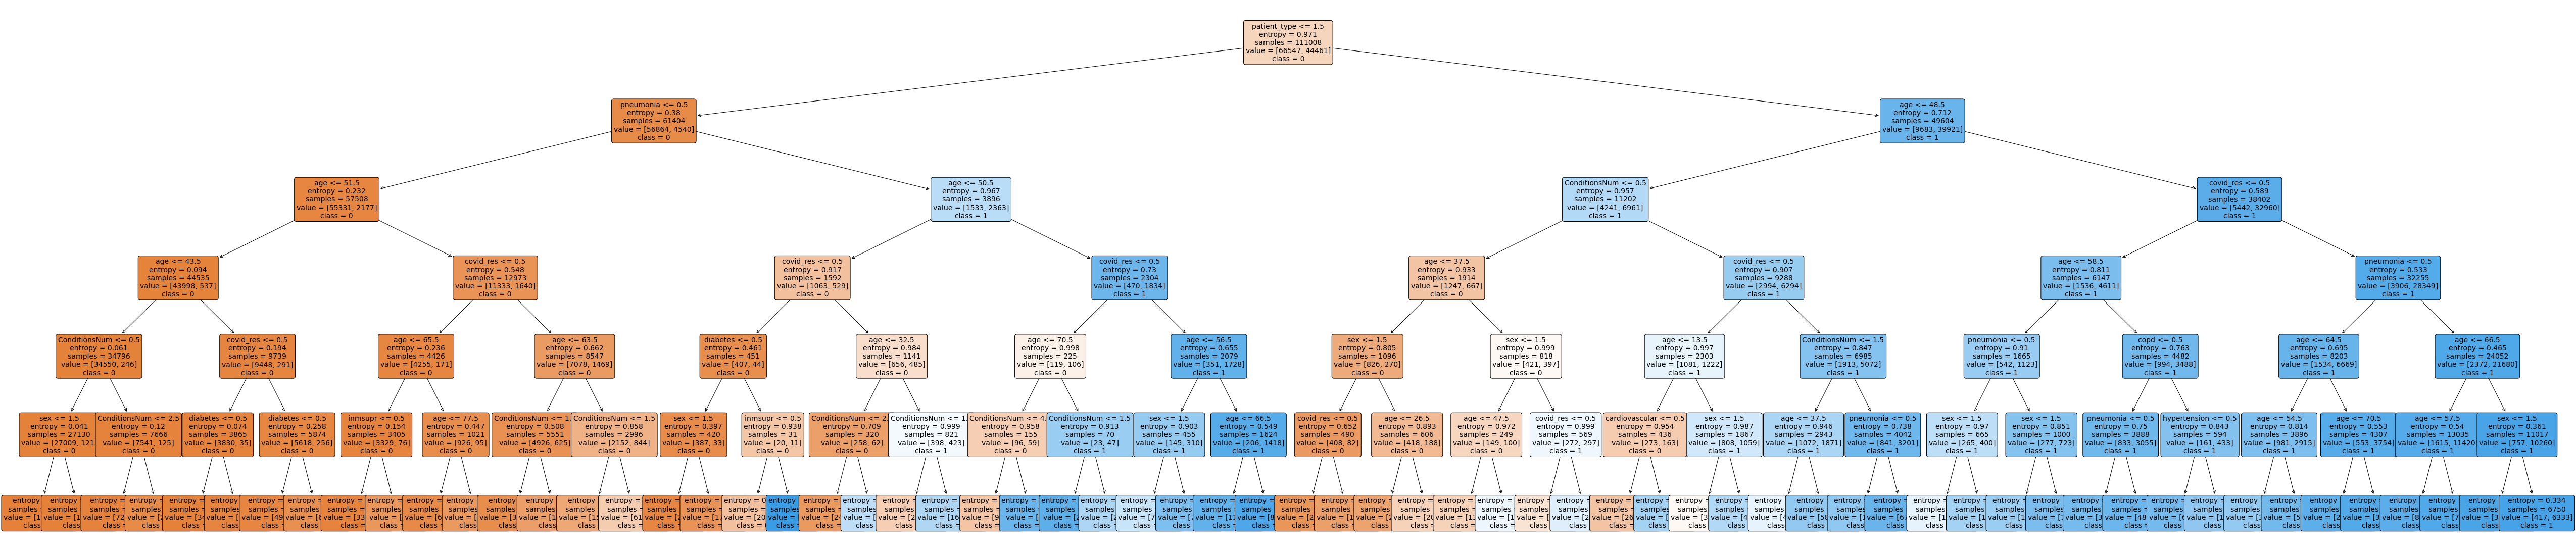

In [ ]:
x = df.drop(['date_died'], axis=1)
y = df['date_died']
y = y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,test_size=0.4)

myTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
myTree = myTree.fit(x_train, y_train)import matplotlib.pyplot as plt

labels = ['0','1']
plt.figure(figsize=(90,20))
tree.plot_tree(myTree,
              feature_names = x_train.columns,
              class_names = labels,
              filled=True, 
              rounded=True, 
              fontsize=14)

[Text(1953.0, 996.6, 'patient_type <= 1.5\ngini = 0.481\nsamples = 50134\nvalue = [29913, 20221]\nclass = 0'),
 Text(976.5, 815.4000000000001, 'pneumonia <= 0.5\ngini = 0.137\nsamples = 27012\nvalue = [25017, 1995]\nclass = 0'),
 Text(488.25, 634.2, 'age <= 60.5\ngini = 0.073\nsamples = 25251\nvalue = [24298, 953]\nclass = 0'),
 Text(244.125, 453.0, 'age <= 50.5\ngini = 0.039\nsamples = 22957\nvalue = [22495, 462]\nclass = 0'),
 Text(122.0625, 271.79999999999995, 'ConditionsNum <= 1.5\ngini = 0.023\nsamples = 19317\nvalue = [19096, 221]\nclass = 0'),
 Text(61.03125, 90.59999999999991, 'gini = 0.017\nsamples = 18228\nvalue = [18070, 158]\nclass = 0'),
 Text(183.09375, 90.59999999999991, 'gini = 0.109\nsamples = 1089\nvalue = [1026, 63]\nclass = 0'),
 Text(366.1875, 271.79999999999995, 'covid_res <= 0.5\ngini = 0.124\nsamples = 3640\nvalue = [3399, 241]\nclass = 0'),
 Text(305.15625, 90.59999999999991, 'gini = 0.037\nsamples = 1996\nvalue = [1958, 38]\nclass = 0'),
 Text(427.21875, 90.59

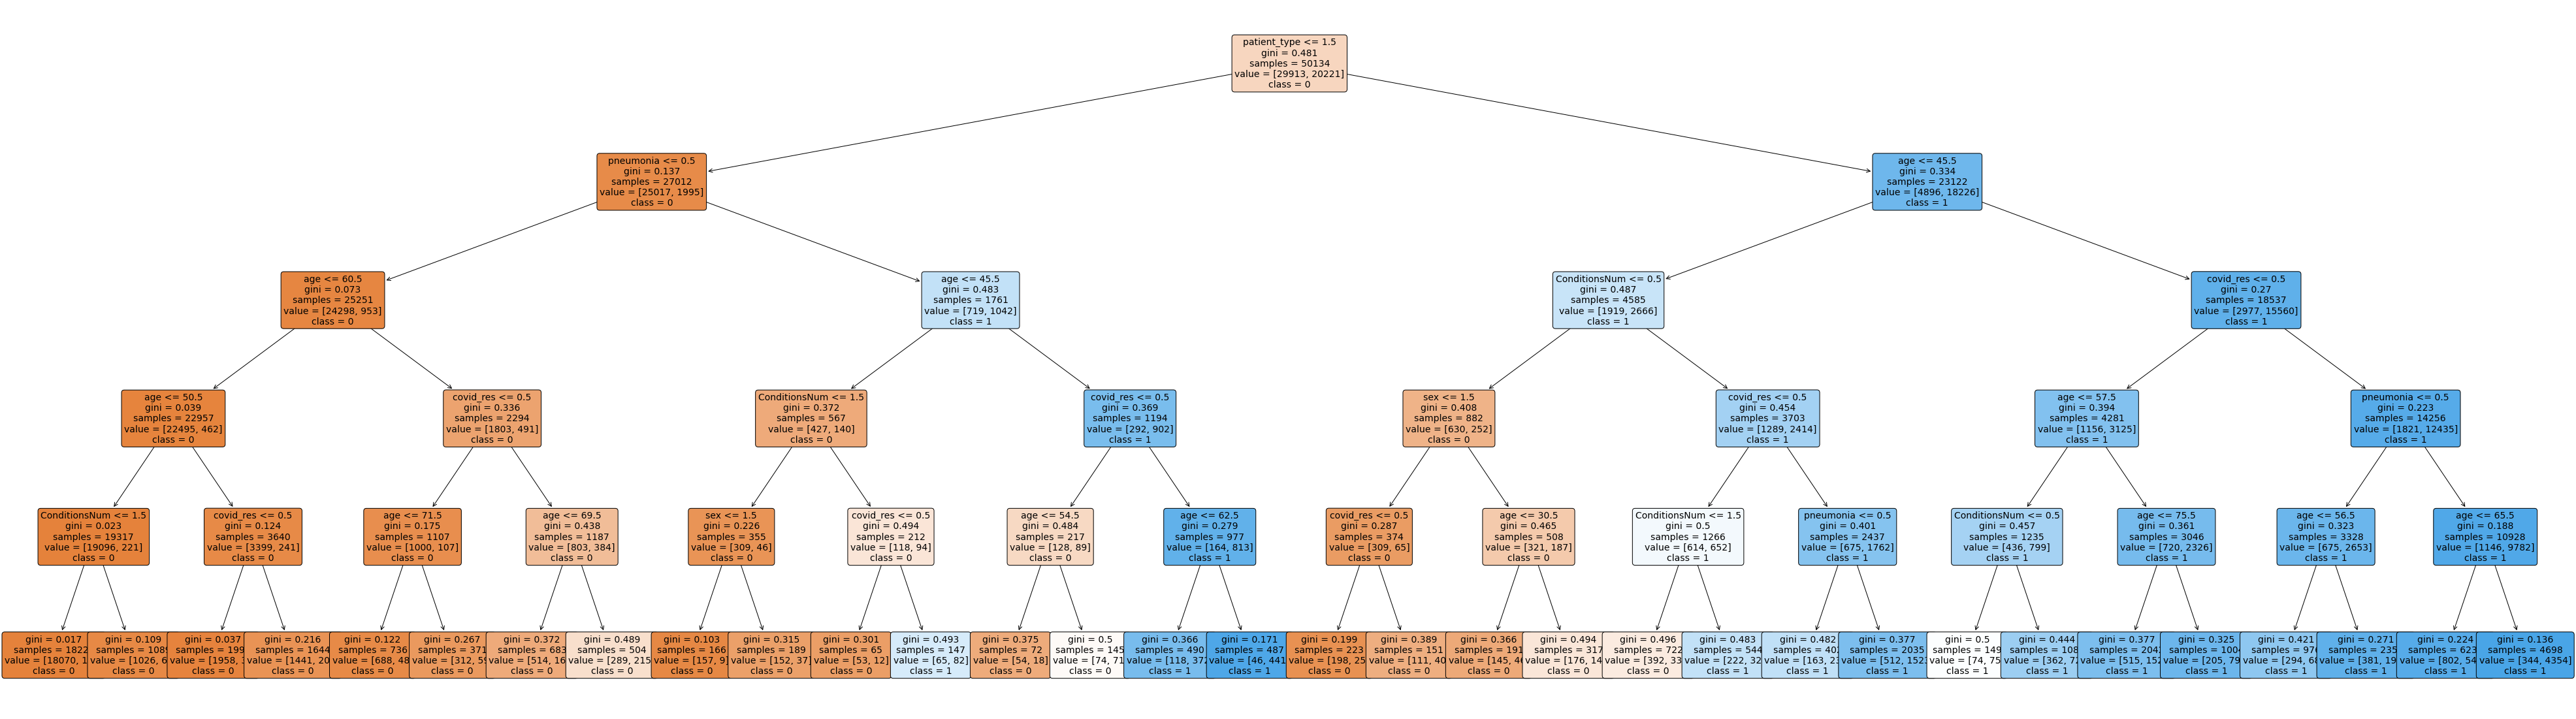

In [ ]:
x = df.drop(['date_died'], axis=1)
y = df['date_died']
y = y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,test_size=0.4)

myTree = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
myTree = myTree.fit(x_train, y_train)import matplotlib.pyplot as plt

labels = ['0','1']
plt.figure(figsize=(70,20))
tree.plot_tree(myTree,
              feature_names = x_train.columns,
              class_names = labels,
              filled=True, 
              rounded=True, 
              fontsize=14)

Performing simple statistics to search for patterns
--------------------------- 

In [ ]:
print('Number of people without any condition and covid positive: ', len(covid[covid['ConditionsNum'] == 0]))
print('Number of people with at least one condition and covid positive: ',len(covid[covid['ConditionsNum'] != 0]))

print('Number of people without any condition and covid negative: ',len(noCovid[noCovid['ConditionsNum'] == 0]))
print('Number of people with at least one condition and covid negative: ',len(noCovid[noCovid['ConditionsNum'] != 0]))

Number of people without any condition and covid positive:  280095
Number of people with at least one condition and covid positive:  262913
Number of people without any condition and covid negative:  216218
Number of people with at least one condition and covid negative:  126580


In [ ]:
def numConditions(columnName, df):
  data = df[df[columnName] == 1]
  print('{:24}{}'.format(columnName, len(data)))

In [ ]:
#people with covid positive
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes']
print('Number of people that are covid positive and have a particular condition:', '\n')
for i in l:
  numConditions(i, covid)

Number of people that are covid positive and have a particular condition: 

pneumonia               106088
copd                    8096
asthma                  14144
cardiovascular          11002
tobacco                 40007
hypertension            105324
other_disease           13303
obesity                 99010
renal_chronic           10451
diabetes                84290


In [ ]:
#people with covid negative
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes']
print('Number of people that are covid negative and have a particular condition:', '\n')
for i in l:
  numConditions(i,noCovid)

Number of people that are covid negative and have a particular condition: 

pneumonia               32544
copd                    5202
asthma                  12146
cardiovascular          7477
tobacco                 31166
hypertension            45606
other_disease           10791
obesity                 47342
renal_chronic           6345
diabetes                32197


In [ ]:
died = len(df[df['date_died'] == 1 ])
population = len(df['date_died'])
mortality = round((died/population)*100,2)
print('Overall mortality rate:', mortality)

died = len(covid[covid['date_died'] == 1 ])
population = len(covid['date_died'])
mortality = round((died/population)*100,2)
print('Mortality rate among COVID positive patients:', mortality)

died = len(noCovid[noCovid['date_died'] == 1 ])
population = len(noCovid['date_died'])
mortality = round((died/population)*100,2)
print('Mortality rate among COVID negative patients:', mortality)

Overall mortality rate: 8.36
Mortality rate among COVID positive patients: 11.67
Mortality rate among COVID negative patients: 3.1


In [ ]:
condition = pd.DataFrame(columns = ['COVID-19 positive', 'COVID-19 negative'], index=['Multiple Conditions', 'No Conditions'])
covid = df[df['covid_res'] == 1]
noCovid = df[df['covid_res'] == 0]

dataCovid = covid[covid['ConditionsNum'] == 0]
pC = dataCovid.groupby(dataCovid['date_died'])['date_died'].count()
tC = pC.sum()
dC = pC[1]
percC = (dC/tC)*100

noCovidData = noCovid[noCovid['ConditionsNum'] == 0]
pN = noCovidData.groupby(noCovidData['date_died'])['date_died'].count()
tN = pN.sum()
dN = pN[1]
percN = (dN/tN)*100

condition.loc['No Conditions'] = [percC, percN]


dataCovid = covid[covid['ConditionsNum'] > 1]
pC = dataCovid.groupby(dataCovid['date_died'])['date_died'].count()
tC = pC.sum()
dC = pC[1]
percC = (dC/tC)*100

noCovidData = noCovid[noCovid['ConditionsNum'] > 1]
pN = noCovidData.groupby(noCovidData['date_died'])['date_died'].count()
tN = pN.sum()
dN = pN[1]
percN = (dN/tN)*100

condition.loc['Multiple Conditions'] = [percC, percN]

print('Mortality rate')
condition

Mortality rate


,COVID-19 positive,COVID-19 negative
Multiple Conditions,30.7262,10.5764
No Conditions,1.82044,0.384585


In [ ]:
dfPercent = pd.DataFrame(columns=['COVID-19 positive', 'COVID-19 negative'], index=['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes'])

def percent(columnName):
  covid = df[df['covid_res'] == 1]
  dataCovid = covid[covid[columnName] == 1]
  pC = dataCovid.groupby(dataCovid['date_died'])['date_died'].count()
  tC = pC.sum()
  dC = pC[1]
  percC = (dC/tC)*100

  Nocovid = df[df['covid_res'] == 0]
  dataN = Nocovid[Nocovid[columnName] == 1]
  pN = dataN.groupby(dataN['date_died'])['date_died'].count()
  tN = pN.sum()
  dN = pN[1]
  percN = (dN/tN)*100
  dfPercent.loc[columnName] = [percC, percN]

In [ ]:
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes']
print('Percent of people with certain condition that did not survive: ', '\n')
for i in l:
  percent(i)
dfPercent

Percent of people with certain condition that did not survive:  



,COVID-19 positive,COVID-19 negative
pneumonia,38.9678,17.0088
copd,34.41,13.8589
asthma,9.12106,1.44497
cardiovascular,27.7767,10.4779
tobacco,13.7401,3.06627
hypertension,25.689,7.82379
other_disease,21.8996,8.5184
obesity,15.6331,3.17361
renal_chronic,37.9659,15.9135
diabetes,27.5399,9.67854


### Bins for age

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


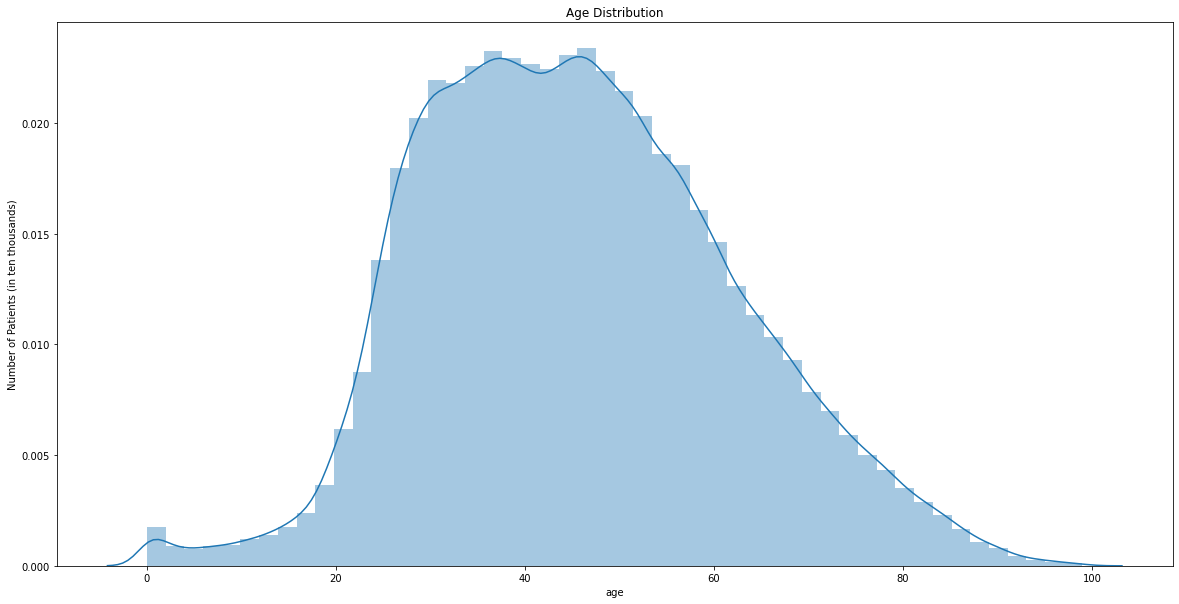

In [ ]:
def assign_bin_to_age(row):
    age = row
    if age <= 2:
        return "2 and Under"
    elif age >= 3 and age <= 12:
        return "3 to 12"
    elif age >= 13 and age <= 17:
        return "13 to 17"
    elif age >= 18 and age <= 25:
        return "18 to 25"
    elif age >= 26 and age <= 34:
        return "26 to 34"
    elif age >= 35 and age <= 54:
        return "35 to 54"
    elif age >= 55 and age <= 64:
        return "55 to 64"
    elif age >= 65 and age <= 74:
        return "65 to 74"
    elif age >= 75 and age <= 84:
        return "75 to 84"
    elif age >= 85:
        return "85+"
        
import matplotlib.pyplot as plt
import seaborn as sns
df['age_bin'] = df.age.apply(lambda row: assign_bin_to_age(row))
df_covid = df[df.covid_res == 1]
plt.figure(figsize=(20,10))
sns.distplot(df_covid.age)
plt.title('Age Distribution')
plt.ylabel('Number of Patients (in ten thousands)')
plt.show()

#### with the help of this graph we can easily tell that between age 30 to 50 most of the people got positive from the covid 19. 

Apriori Preprocessing
---------------------

In [ ]:
dfAp = df[df['covid_res'] == 1]

In [ ]:
print(len(dfAp[dfAp['date_died'] == 1]))
print(len(dfAp[dfAp['date_died'] == 0]))

26690
192174


In [ ]:
died_no = dfAp[dfAp.date_died == 0].index
died_yes = dfAp[dfAp.date_died == 1].index

#the number indicates the number of samples in class date_died = 0, we can adjust that number
random_index = np.random.choice(died_no, 35000, replace = False)
under_sample_died_no = np.concatenate([died_yes, random_index])

dfAp = dfAp.loc[under_sample_died_no]

In [ ]:
#numeric values to nominal
dfAp.loc[dfAp['sex'] == 1, 'sex'] = 'female'
dfAp.loc[dfAp['sex'] == 2, 'sex'] = 'male'
dfAp.loc[dfAp['patient_type'] == 1, 'patient_type'] = 'outpatient'
dfAp.loc[dfAp['patient_type'] == 2, 'patient_type'] = 'inpatient'
dfAp.loc[dfAp['date_died'] == 1, 'date_died'] = 'yes'
dfAp.loc[dfAp['date_died'] == 0, 'date_died'] = 'no'

In [ ]:
#function takes dataset name anad column name and changes values to the column name if 1 and to blank if 0
def aprioriPreprocess(columnName,dataset):
  dataset.loc[dataset[columnName]== 1, columnName] = columnName
  dataset.loc[dataset[columnName]== 0, columnName] = ''

In [ ]:
#run function of a set of columns that apply to this rule
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes','covid_res','inmsupr']
for i in l:
  aprioriPreprocess(i, dfAp)

In [ ]:
dfAp['ConditionsNum'] = dfAp['ConditionsNum'].astype(float)

In [ ]:
dfAp.loc[dfAp['ConditionsNum'] > 1, 'ConditionsNum'] = 'More than one'

In [ ]:
dfAp.loc[dfAp['ConditionsNum'] == 0, 'ConditionsNum'] = 'None'

In [ ]:
dfAp.loc[dfAp['ConditionsNum'] == 1, 'ConditionsNum'] = 'One'


In [ ]:
dfAp

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,ConditionsNum,age_bin
4,female,inpatient,yes,,60,diabetes,,,,hypertension,,cardiovascular,,,,covid_res,More than one,55 to 64
5,male,inpatient,yes,pneumonia,47,diabetes,,,,,,,,,,covid_res,More than one,35 to 54
24,female,outpatient,yes,,61,,,,,hypertension,,,,,,covid_res,One,55 to 64
36,male,inpatient,yes,pneumonia,77,,,,,hypertension,,,,,,covid_res,More than one,75 to 84
41,female,inpatient,yes,pneumonia,53,diabetes,,,,,,,obesity,,,covid_res,More than one,35 to 54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145816,female,outpatient,no,,68,diabetes,,,,hypertension,,,obesity,,,covid_res,More than one,65 to 74
50854,female,outpatient,no,,25,,,,,,,,,,,covid_res,None,18 to 25
188471,male,inpatient,no,,53,diabetes,,,,,,,obesity,,,covid_res,More than one,35 to 54
141386,male,outpatient,no,,68,diabetes,,,,hypertension,,,,,,covid_res,More than one,65 to 74


In [ ]:
#drop unwanted columns 
dfAp = dfAp.drop(columns=['age', 'covid_res', 'patient_type'])

In [ ]:
%pip install apyori

In [ ]:
#change dataframe to a list of lists
dataList = dfAp.values.tolist()

In [ ]:
# drop missing values for the list of lists
N = ''
res = [[ele for ele in sub if ele != N] for sub in dataList]

In [ ]:
from apyori import apriori
association_rules = apriori(res, min_support = 0.2, min_confidence = 0.7, min_lift = 1.1)

association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({'diabetes', 'More than one'}), support=0.2114605284486951, ordered_statistics=[OrderedStatistic(items_base=frozenset({'diabetes'}), items_add=frozenset({'More than one'}), confidence=0.8916000273392113, lift=2.2723737114875417)]),
 RelationRecord(items=frozenset({'hypertension', 'More than one'}), support=0.24631220619225158, ordered_statistics=[OrderedStatistic(items_base=frozenset({'hypertension'}), items_add=frozenset({'More than one'}), confidence=0.8737780333525015, lift=2.226951740446842)]),
 RelationRecord(items=frozenset({'pneumonia', 'More than one'}), support=0.28999837899173286, ordered_statistics=[OrderedStatistic(items_base=frozenset({'More than one'}), items_add=frozenset({'pneumonia'}), confidence=0.7391034910142533, lift=1.7369635946921633)]),
 RelationRecord(items=frozenset({'yes', 'More than one'}), support=0.2760577078943103, ordered_statistics=[OrderedStatistic(items_base=frozenset({'More than one'}), items_add=frozenset({'yes'}), co

In [ ]:
association_results[7][1]

0.21710163721834982

In [ ]:
#resource: https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    if 'yes' in items: 
      if len(items) == 2:
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")
      else:
        print("Rule: " + items[0] +' '+ items[1] + " -> " + items[2])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

Rule: yes -> More than one
Support: 0.2760577078943103
Confidence: 0.7035736418095435
Lift: 1.6262067427212716
Rule: pneumonia -> yes
Support: 0.3299724428594586
Confidence: 0.7754666666666666
Lift: 1.7923768702385412
Rule: pneumonia yes -> More than one
Support: 0.23408980385799968
Confidence: 0.8072107322526552
Lift: 1.865748597701997
Rule: pneumonia male -> yes
Support: 0.21710163721834982
Confidence: 0.7911743856332704
Lift: 1.8286829467859291


In [ ]:
dfAp.to_csv ('/content/Mydrive/My Drive/AprioriSet.csv', index = False, header=True) 